In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:

df = pd.read_excel("all_schedules.xlsx")


df['team'] = df['team'].astype(str)
df['Opponent'] = df['Opponent'].astype(str)

#ignore comments in this cell

# create new column with sorted team names
#df['matchup'] = df.apply(lambda row: '-'.join(sorted([row['team'], row['Opponent']])), axis=1)

# create unique identifier for each matchup
#df['matchup_id'] = df['New Date'].astype(str) + '-' + df['team']

# drop duplicate rows based on matchup_id
#df = df.drop_duplicates(subset='matchup_id')

# drop matchup and matchup_id columns
#df = df.drop(columns=['matchup', 'matchup_id']) #filter out games that are repeated on the same day... do we need to do this?


df

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,35,"Sun,",2023-03-19,CBI,N,Eastern Kentucky,A-Sun,-2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Cleveland St.,cleveland-state,0,2023
57805,31,"Sun,",2023-03-19,CBI,N,Milwaukee,Horizon,-4.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Stetson,stetson,0,2023
57806,34,"Sun,",2023-03-19,CBI,N,Tarleton State,WAC,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Radford,radford,0,2023
57807,34,"Sun,",2023-03-19,CBI,N,Duquesne,A-10,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Rice,rice,0,2023


In [3]:
df.head()

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016


In [4]:
team_stats = pd.read_excel("all_cbb_data.xlsx")
team_stats = team_stats.iloc[:, : 24]



In [5]:
merged = df.merge(team_stats, left_on=['team', 'Year'], right_on=['TEAM', 'Year'])
merged


,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,29,"Fri,",2023-02-24,REG,H,UC Riverside,Big West,1.14,L,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57805,30,"Sat,",2023-02-25,REG,H,UC Irvine,Big West,5.07,W,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57806,31,"Thu,",2023-03-02,REG,A,Cal State Northridge,Big West,-9.95,W,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57807,32,"Sat,",2023-03-04,REG,A,UC Santa Barbara,Big West,3.87,L,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN


Training Set and Testing set will be filtered to correct features and values in later steps

In [6]:
training_set = merged
training_set

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,29,"Fri,",2023-02-24,REG,H,UC Riverside,Big West,1.14,L,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57805,30,"Sat,",2023-02-25,REG,H,UC Irvine,Big West,5.07,W,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57806,31,"Thu,",2023-03-02,REG,A,Cal State Northridge,Big West,-9.95,W,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57807,32,"Sat,",2023-03-04,REG,A,UC Santa Barbara,Big West,3.87,L,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN


In [7]:
#test = df
training_set["Winner"] = np.where(training_set['W/L'] == 'W', training_set['team'], training_set['Opponent'])
training_set.head()

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Winner
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Abilene Christian
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Abilene Christian
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Portland
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Colorado State
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Abilene Christian


SELECT FEATURES FOR TRAINING SET HERE

In [8]:
training_set = training_set[['team', 'Opponent', "Winner", "W/L", "SRS", 'Site',"BARTHAG" ,"2P_O", "3P_O" ,"Year", "Type"]]
training_set = training_set.dropna() #SVM CANNOT BE TRAINED ON NA DATA

print(len(training_set))
training_set.head()
training_set.reset_index(drop=True, inplace=True)

training_set.head()

44361


,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type
0,Abilene Christian,Portland,Portland,L,-2.21,A,0.1529,48.4,36.3,2016,REG
1,Abilene Christian,Colorado State,Colorado State,L,2.31,A,0.1529,48.4,36.3,2016,REG
2,Abilene Christian,Florida A&M,Abilene Christian,W,-21.74,N,0.1529,48.4,36.3,2016,REG
3,Abilene Christian,Oakland,Oakland,L,6.30,N,0.1529,48.4,36.3,2016,REG
4,Abilene Christian,New Hampshire,New Hampshire,L,-7.89,H,0.1529,48.4,36.3,2016,REG


After label encoding in the next steps, split the dataset into training and testing sets based on the year

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded if not numerical
converted_season = training_set
converted_season["team"]=encoder.fit_transform(training_set["team"])
converted_season["Opponent"]=encoder.fit_transform(training_set["Opponent"])
converted_season["Site"]=encoder.fit_transform(training_set["Site"]) #if site is 1 then it is a home game, 2 is neutral, 3 is away



converted_season.head()

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type
0,0,280,Portland,L,-2.21,0,0.1529,48.4,36.3,2016,REG
1,0,69,Colorado State,L,2.31,0,0.1529,48.4,36.3,2016,REG
2,0,102,Abilene Christian,W,-21.74,2,0.1529,48.4,36.3,2016,REG
3,0,261,Oakland,L,6.30,2,0.1529,48.4,36.3,2016,REG
4,0,235,New Hampshire,L,-7.89,1,0.1529,48.4,36.3,2016,REG


In [10]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['Opponent'])
# changes the winner column to match up with the encoded winner

converted_season.head()

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type
0,0,280,280,L,-2.21,0,0.1529,48.4,36.3,2016,REG
1,0,69,69,L,2.31,0,0.1529,48.4,36.3,2016,REG
2,0,102,0,W,-21.74,2,0.1529,48.4,36.3,2016,REG
3,0,261,261,L,6.30,2,0.1529,48.4,36.3,2016,REG
4,0,235,235,L,-7.89,1,0.1529,48.4,36.3,2016,REG


In [11]:
converted_season = converted_season.drop(columns=["W/L"])

converted_season.head()

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type
0,0,280,280,-2.21,0,0.1529,48.4,36.3,2016,REG
1,0,69,69,2.31,0,0.1529,48.4,36.3,2016,REG
2,0,102,0,-21.74,2,0.1529,48.4,36.3,2016,REG
3,0,261,261,6.30,2,0.1529,48.4,36.3,2016,REG
4,0,235,235,-7.89,1,0.1529,48.4,36.3,2016,REG


In [12]:
converted_season.loc[converted_season["team"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["team"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head()

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,team_game_win
0,0,280,280,-2.21,0,0.1529,48.4,36.3,2016,REG,1.0
1,0,69,69,2.31,0,0.1529,48.4,36.3,2016,REG,1.0
2,0,102,0,-21.74,2,0.1529,48.4,36.3,2016,REG,2.0
3,0,261,261,6.30,2,0.1529,48.4,36.3,2016,REG,1.0
4,0,235,235,-7.89,1,0.1529,48.4,36.3,2016,REG,1.0


CORRELATION MATRIX


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\divys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


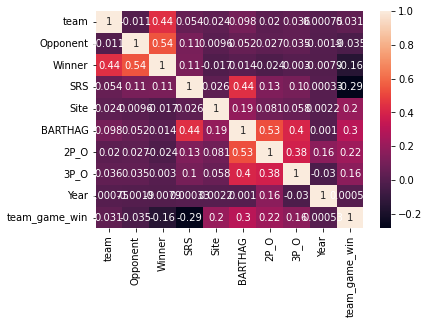

In [13]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

Extract any features that have high correlation. 

TRAINING DATA will be set to entire 2016 season and testing data will be set to 2017 NCAA tournament games

In [14]:
training_set = converted_season.loc[converted_season["Year"] == 2016] # training set 
testing_set = converted_season.loc[(converted_season["Year"] == 2017) & (converted_season["Type"] == "NCAA")] # testing set

testing_set

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,team_game_win
11065,102,325,102,-2.30,2,0.9728,56.3,38.2,2017,NCAA,2.0
11066,102,256,102,14.02,2,0.9728,56.3,38.2,2017,NCAA,2.0
11067,102,409,102,24.45,2,0.9728,56.3,38.2,2017,NCAA,2.0
11068,102,424,102,14.80,2,0.9728,56.3,38.2,2017,NCAA,2.0
11069,102,320,102,17.52,2,0.9728,56.3,38.2,2017,NCAA,2.0
...,...,...,...,...,...,...,...,...,...,...,...
20016,201,373,373,-5.21,2,0.5043,52.7,32.7,2017,NCAA,1.0
20051,294,245,245,24.84,2,0.3437,50.0,29.6,2017,NCAA,1.0
21836,235,330,330,11.48,2,0.8278,49.1,37.1,2017,NCAA,1.0
21865,234,260,260,17.81,2,0.7989,50.5,37.6,2017,NCAA,1.0


In [15]:
training_set = training_set.drop(["Year", "Type"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year", "Type"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values

print(len(X_train))
print(len(X_test))
X_train[:5]



11032
134


array([[ 0.000e+00,  2.800e+02,  2.800e+02, -2.210e+00,  0.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01],
       [ 0.000e+00,  6.900e+01,  6.900e+01,  2.310e+00,  0.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01],
       [ 0.000e+00,  1.020e+02,  0.000e+00, -2.174e+01,  2.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01],
       [ 0.000e+00,  2.610e+02,  2.610e+02,  6.300e+00,  2.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01],
       [ 0.000e+00,  2.350e+02,  2.350e+02, -7.890e+00,  1.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01]])

In [16]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

#Y_train

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [18]:
kernels = ["linear", "rbf", "poly"]


In [19]:
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto", kernel="linear")
svm_clf.fit(X_train,Y_train)
Y_pred=svm_clf.predict(X_test)
print("Acurracy of our linear model is :")
accuracy_score(Y_test,Y_pred)

C:\Users\divys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurracy of our linear model is :


0.7238805970149254

In [20]:
svm_clf=SVC(gamma="auto", kernel="rbf")
svm_clf.fit(X_train,Y_train)
Y_pred=svm_clf.predict(X_test)
print("Acurracy of our rbf model is :")
accuracy_score(Y_test,Y_pred)

C:\Users\divys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurracy of our rbf model is :


0.9328358208955224

In [21]:
svm_clf=SVC(gamma="auto", kernel="poly")
svm_clf.fit(X_train,Y_train)
Y_pred=svm_clf.predict(X_test)
print("Acurracy of our poly model is :")
accuracy_score(Y_test,Y_pred)

C:\Users\divys\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurracy of our poly model is :


0.753731343283582